Dependencies

In [1]:
import tensorflow as tf 
import os

removing dodgy images

In [2]:
import cv2
import imghdr

C:\Users\Bruce\AppData\Local\Temp\ipykernel_7384\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
data_dir = 'data1'

In [5]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext list data1\kale\20138805001_front_a06_-2.png
Image not in ext list data1\kale\23486_original.jpg
Image not in ext list data1\kale\24px.svg
Image not in ext list data1\kale\4512.jpg
Image not in ext list data1\kale\7631.png
Image not in ext list data1\kale\a-fresh-leaf-of-green-kale-on-white-background.jpg
Image not in ext list data1\kale\darkibororganickale-darkibororganickale-image-40046-darkibor.jpg
Image not in ext list data1\kale\desktop_searchbox_sprites318_hr.webp
Image not in ext list data1\kale\fresh-green-organic-kale-leaves-on-blue-background-healthy-f.jpg
Image not in ext list data1\kale\image (1).svg
Image not in ext list data1\kale\image (10).svg
Image not in ext list data1\kale\image (11).svg
Image not in ext list data1\kale\image (12).svg
Image not in ext list data1\kale\image (13).svg
Image not in ext list data1\kale\image (14).svg
Image not in ext list data1\kale\image (15).svg
Image not in ext list data1\kale\image (16).svg
Image not in ext list data1

In [11]:
import os

def check_file_names(directory):
    for root, dirs, files in os.walk(directory):
        for name in files + dirs:
            try:
                name.encode('utf-8')
            except UnicodeEncodeError:
                print(f"Non-UTF-8 file or directory name: {os.path.join(root, name)}")

check_file_names('data1')

In [12]:
import tensorflow as tf

def safe_image_dataset_from_directory(directory):
    try:
        return tf.keras.utils.image_dataset_from_directory(directory)
    except UnicodeDecodeError as e:
        print(f"Skipping problematic file: {e}")
        return None

data = safe_image_dataset_from_directory('data1')

Found 552 files belonging to 2 classes.


In [ ]:
import cv2
import matplotlib.pyplot as plt

def show_image(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.axis("off")
        plt.title(image_path)
        plt.show()
    else:
        print(f"❌ Unable to read: {image_path}")

data_dir = "data1"

for root, _, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(root, file)
        img = cv2.imread(file_path)
        if img is None:  
            print(f"❌ Corrupted image: {file_path}")
            show_image(file_path) 


Data Loading

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [45]:
data = tf.keras.utils.image_dataset_from_directory('data1')

Found 552 files belonging to 2 classes.


In [55]:
data_iterator = data.as_numpy_iterator()

In [56]:
batch = data_iterator.next()

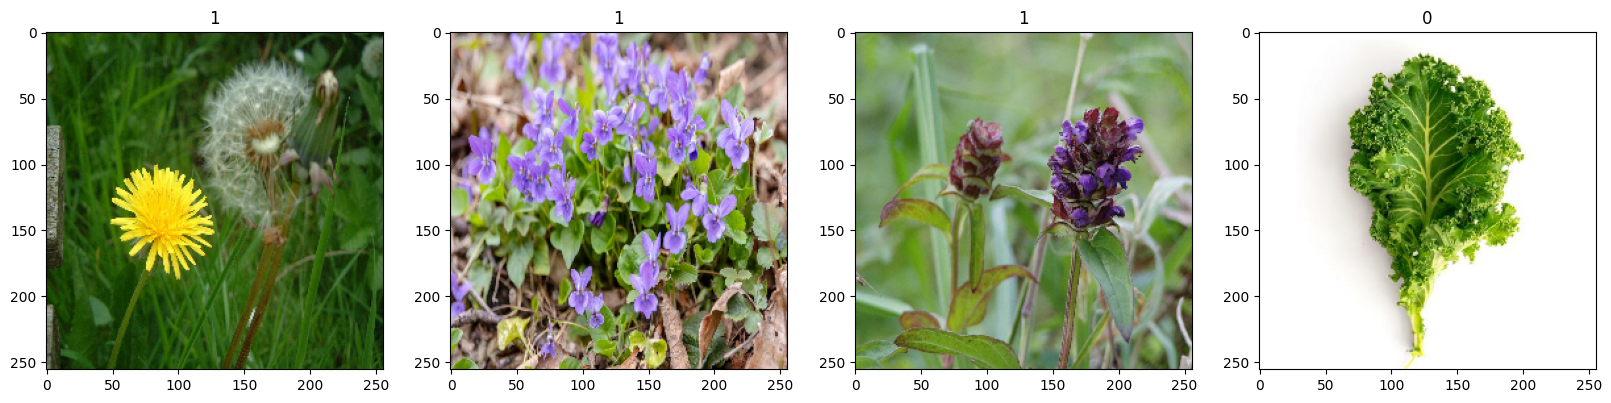

In [57]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Scale Data

In [58]:
data = data.map(lambda x,y: (x/255, y))

In [59]:
data.as_numpy_iterator().next()

(array([[[[0.2667586 , 0.4001149 , 0.16073836],
          [0.30955285, 0.44542906, 0.18842788],
          [0.34438962, 0.48483846, 0.1989989 ],
          ...,
          [0.5013059 , 0.64483696, 0.02590479],
          [0.5143168 , 0.65940666, 0.05158816],
          [0.52927387, 0.67434895, 0.06657475]],
 
         [[0.28724724, 0.42470893, 0.15700828],
          [0.32199448, 0.46193182, 0.17920025],
          [0.34079248, 0.48527777, 0.17365794],
          ...,
          [0.5319319 , 0.67866963, 0.06156299],
          [0.5180041 , 0.66186297, 0.05833805],
          [0.50491726, 0.64630055, 0.05029105]],
 
         [[0.56641394, 0.71543354, 0.38948375],
          [0.5707893 , 0.7198827 , 0.38385332],
          [0.54207706, 0.6943825 , 0.33684525],
          ...,
          [0.5365421 , 0.68633676, 0.08369382],
          [0.4903799 , 0.6432062 , 0.04662501],
          [0.45006126, 0.6028876 , 0.01142004]],
 
         ...,
 
         [[0.39100796, 0.53195465, 0.15663296],
          [0.41050

Scale Data

In [60]:
len(data)

18

In [61]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [62]:
train_size+val_size+test_size

18

In [64]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Deep Learning Model

In [65]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [68]:
model = Sequential()

In [69]:
import os

data_dir = "data1/weeds" 

for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        print(f"Class '{class_name}' has {len(os.listdir(class_path))} images")


In [44]:
images, labels = next(iter(train))
print(f"Image batch shape: {images.shape}")


Image batch shape: (32, 256, 256, 3)


In [70]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [71]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Train

In [73]:
logdir='logs'

In [74]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [75]:
for images, labels in train.take(1): 
    print(f"Batch shape: {images.shape}, Labels shape: {labels.shape}")

Batch shape: (32, 256, 256, 3), Labels shape: (32,)


In [76]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 778ms/step - accuracy: 0.5325 - loss: 0.9565 - val_accuracy: 0.5547 - val_loss: 0.6723
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 753ms/step - accuracy: 0.6044 - loss: 0.6476 - val_accuracy: 0.6484 - val_loss: 0.5981
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 762ms/step - accuracy: 0.7458 - loss: 0.5357 - val_accuracy: 0.7656 - val_loss: 0.4946
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 741ms/step - accuracy: 0.7635 - loss: 0.5351 - val_accuracy: 0.8281 - val_loss: 0.4088
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 765ms/step - accuracy: 0.8143 - loss: 0.4132 - val_accuracy: 0.7109 - val_loss: 0.5200
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 767ms/step - accuracy: 0.7920 - loss: 0.4051 - val_accuracy: 0.8828 - val_loss: 0.3302
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 745ms/step - accuracy: 0.8762 - loss: 0.3201 - val_accuracy: 0.8438 - val_loss: 0.3768
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 765ms/step - accuracy: 0.9111 - loss: 0.2607 - val_accuracy:

Plot Perfomance

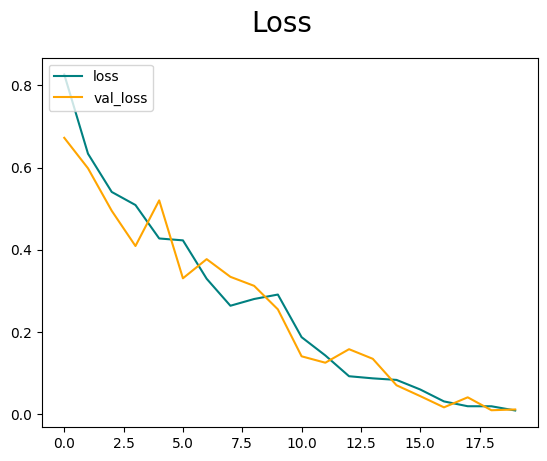

In [77]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

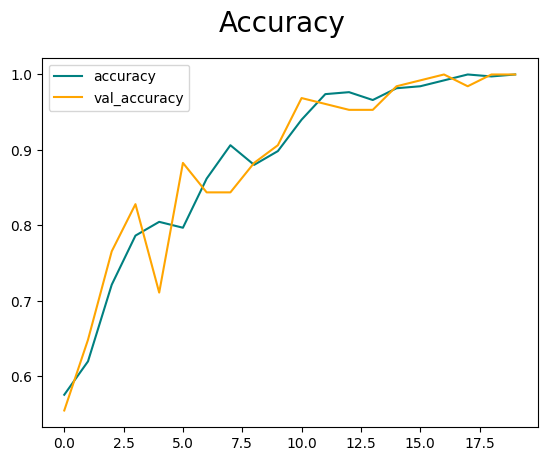

In [78]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluation

In [79]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [80]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [81]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


In [82]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


Test

In [83]:
import cv2
import matplotlib.pyplot as plt
import os

In [ ]:

image_path = 'kale1.png'
img = cv2.imread(image_path)


if img is None:
    print("❌ Error: Image not found or couldn't be loaded.")
    print("🔍 Current working directory:", os.getcwd())
    print("📂 Available files in directory:", os.listdir())
else:
    print("✅ Image loaded successfully! Shape:", img.shape)

✅ Image loaded successfully! Shape: (622, 608, 3)


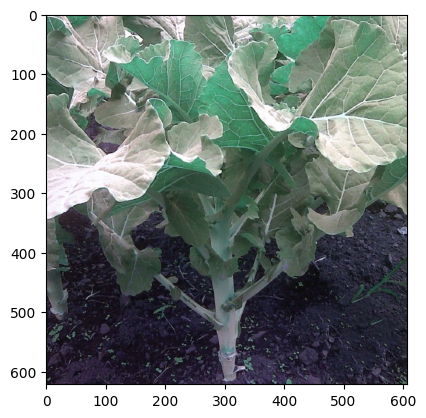

In [129]:
img = cv2.imread('kale1.png')
plt.imshow(img)
plt.show()

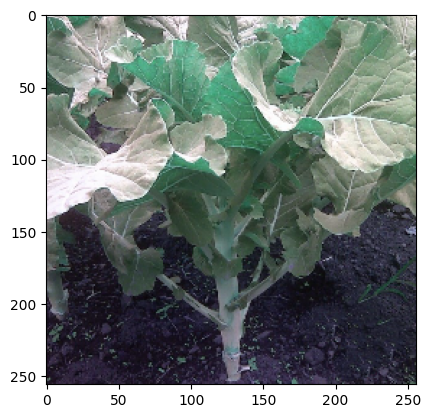

In [130]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [131]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


In [132]:
yhat

array([[1.7393784e-06]], dtype=float32)

In [134]:
if yhat > 0.5:
    print(f'Predicted class is weed')
else:
    print(f'Predicted class is Kale')

Predicted class is Kale


Saving Model

In [95]:
from tensorflow.keras.models import load_model

In [96]:
model.save(os.path.join('models', 'kale-weedClassifier.h5'))

In [97]:
new_model = load_model(os.path.join('models', 'kale-weedClassifier.h5'))

In [98]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


array([[1.7393784e-06]], dtype=float32)